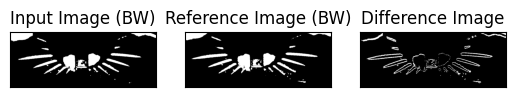

Similarity Score: 203892.3000
Kicker Detected


In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def calculate_similarity(image_path, reference_path, white_weight=1, black_weight=0.0, threshold_val=127):
    # Load the input image and reference image
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "Image file could not be read, check path."
    
    reference = cv.imread(reference_path, cv.IMREAD_GRAYSCALE)
    assert reference is not None, "Reference file could not be read, check path."
    
    # Apply binary thresholding to make the images black and white
    _, img_bw = cv.threshold(img, threshold_val, 255, cv.THRESH_BINARY) 
    _, reference_bw = cv.threshold(reference, threshold_val, 255, cv.THRESH_BINARY)

    # keep the roi as the upper half of the image
    img_bw = img_bw[:img_bw.shape[0]//2, :]

    # Calculate the absolute difference between the two binary images
    diff = cv.absdiff(reference_bw, img_bw)
    
    # Count the number of white and black pixels in the difference image
    total_pixels = img_bw.size
    white_diff = np.sum(diff == 255)
    black_diff = np.sum(diff == 0)

    # Calculate the weighted similarity score
    white_similarity = (total_pixels - white_diff) * white_weight
    black_similarity = black_diff * black_weight
    
    total_similarity_score = white_similarity + black_similarity / total_pixels
    
    # Visualize the result of the difference
    plt.subplot(131), plt.imshow(img_bw, cmap='gray')
    plt.title('Input Image (BW)'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(reference_bw, cmap='gray')
    plt.title('Reference Image (BW)'), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(diff, cmap='gray')
    plt.title('Difference Image'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Print the similarity score
    print(f'Similarity Score: {total_similarity_score:.4f}')

    # Decision based on the score
    if total_similarity_score > 0.8:  # Threshold for deciding if kicker is detected
        print("Kicker Detected")
    else:
        print("Kicker Not Detected")

# Test the function
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at front position/Trial 3.jpg'
reference_path = 'template image/template.jpg'

calculate_similarity(image_path, reference_path)


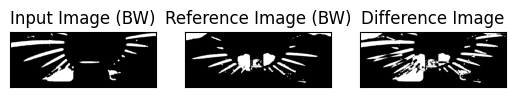

Similarity Score: 171056.7000
Kicker Detected


In [20]:
# Test the function
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Invalid Case/Kicker in reverse orientation/Trial 1.jpg'
reference_path = 'template image/template.jpg'

calculate_similarity(image_path, reference_path)


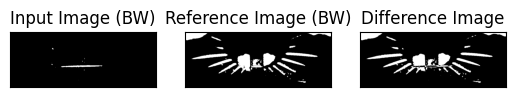

Similarity Score: 189614.7000
Kicker Detected


In [21]:
# Test the function
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at pos 100/Trial 3.jpg'
reference_path = 'template image/template.jpg'

calculate_similarity(image_path, reference_path)